# S4- CASO PRACTICO-BDD FINAL

### Integrantes: 
    * César Ayerve
    * Diego Ortiz
    * Lizeth Peña
    * Sandra Villamarín

#### Modelar a su preferencia (pero justificado datos de la cadena de supermercados de EEUU, Wallmart.)

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

- Tienda-el número de la tienda.
- Fecha-la semana de ventas
- Weekly_Sales - ventas para la tienda dada.
- Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.
- Temperatura - Temperatura el día de la venta.
- Fuel_price -costo del combustible en la región. 
- IPC-índice de precios al consumidor vigente. 
- Desempleo - tasa de desempleo predominante. 
- Eventos festivos.
    - Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 
    - Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
    - Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
    - Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13


#### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [16]:
#importar la base de datos
df=pd.read_csv("Walmart.csv")
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [17]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.describe(include = 'object')

,Date
count,6435
unique,143
top,05-02-2010
freq,45


In [4]:
# Convertir la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Definir las fechas de los eventos festivos
fechas_eventos = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Día del Trabajo': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Acción de Gracias': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Navidad': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
}

# Convertir las fechas de eventos a datetime
for evento in fechas_eventos:
    fechas_eventos[evento] = pd.to_datetime(fechas_eventos[evento])

# Función para determinar el evento festivo de la semana
def determinar_evento(fila):
    for evento, fechas in fechas_eventos.items():
        if fila in fechas:
            return evento
    return None

# Aplicar la función al dataframe
df['Evento'] = df['Date'].apply(determinar_evento)

# Renombrar las columnas a español
df.rename({
    'Store': 'Tienda', 
    'Date': 'Fecha', 
    'Weekly_Sales': 'Ventas_Semanales',
    'Holiday_Flag': 'Bandera_Vacaciones',
    'Temperature': 'Temperatura',
    'Fuel_Price': 'Precio_Combustible', 
    'CPI': 'IPC',
    'Unemployment': 'Desempleo'
}, axis=1, inplace=True)

# Muestro info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tienda              6435 non-null   int64         
 1   Fecha               6435 non-null   datetime64[ns]
 2   Ventas_Semanales    6435 non-null   float64       
 3   Bandera_Vacaciones  6435 non-null   int64         
 4   Temperatura         6435 non-null   float64       
 5   Precio_Combustible  6435 non-null   float64       
 6   IPC                 6435 non-null   float64       
 7   Desempleo           6435 non-null   float64       
 8   Evento              450 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 452.6+ KB


In [5]:
df.head()

,Tienda,Fecha,Ventas_Semanales,Bandera_Vacaciones,Temperatura,Precio_Combustible,IPC,Desempleo,Evento
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,None
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,None
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,None
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,None


#### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [6]:
# Obtener descriptivos resumen de la base de datos
descriptivos = df.describe()

# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object', 'datetime64[ns]', 'category']).columns.tolist()

# Imprimir los descriptivos resumen
print(descriptivos)

# Imprimir las variables numéricas y categóricas
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

            Tienda                Fecha  Ventas_Semanales  Bandera_Vacaciones  \
count  6435.000000                 6435      6.435000e+03         6435.000000   
mean     23.000000  2011-06-17 00:00:00      1.046965e+06            0.069930   
min       1.000000  2010-02-05 00:00:00      2.099862e+05            0.000000   
25%      12.000000  2010-10-08 00:00:00      5.533501e+05            0.000000   
50%      23.000000  2011-06-17 00:00:00      9.607460e+05            0.000000   
75%      34.000000  2012-02-24 00:00:00      1.420159e+06            0.000000   
max      45.000000  2012-10-26 00:00:00      3.818686e+06            1.000000   
std      12.988182                  NaN      5.643666e+05            0.255049   

       Temperatura  Precio_Combustible          IPC    Desempleo  
count  6435.000000         6435.000000  6435.000000  6435.000000  
mean     60.663782            3.358607   171.578394     7.999151  
min      -2.060000            2.472000   126.064000     3.879000  
25

#### 3. Evalúe si la base contiene datos perdidos.

In [7]:
# Evaluar si la base contiene datos perdidos
datos_perdidos = df.isnull().sum()

# Imprimir la cantidad de datos perdidos por columna
print("Datos perdidos por columna:")
print(datos_perdidos)

# Verificar si hay alguna columna con datos perdidos
hay_datos_perdidos = datos_perdidos.any()

# Imprimir si hay o no datos perdidos en el dataset
if hay_datos_perdidos:
    print("Hay datos perdidos en el dataset.")
else:
    print("No hay datos perdidos en el dataset.")


Datos perdidos por columna:
Tienda                   0
Fecha                    0
Ventas_Semanales         0
Bandera_Vacaciones       0
Temperatura              0
Precio_Combustible       0
IPC                      0
Desempleo                0
Evento                5985
dtype: int64
Hay datos perdidos en el dataset.


#### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers) 
De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 

Tienda tiene 0 outliers


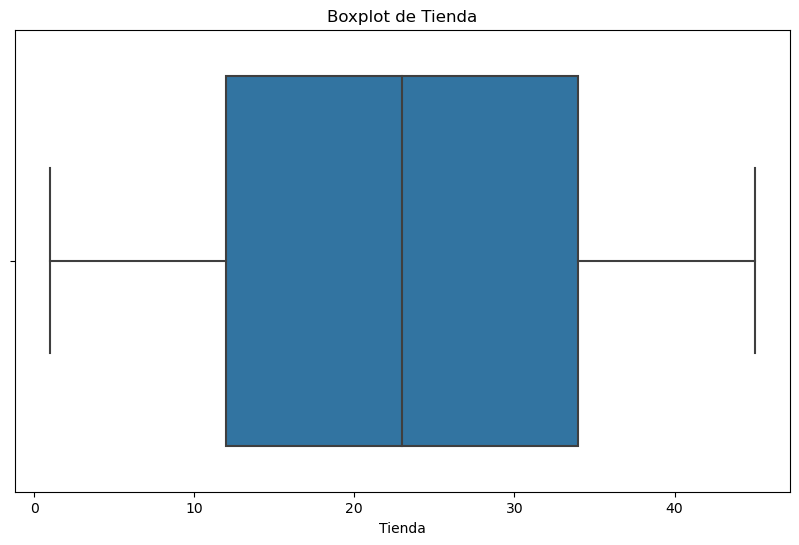

Ventas_Semanales tiene 34 outliers


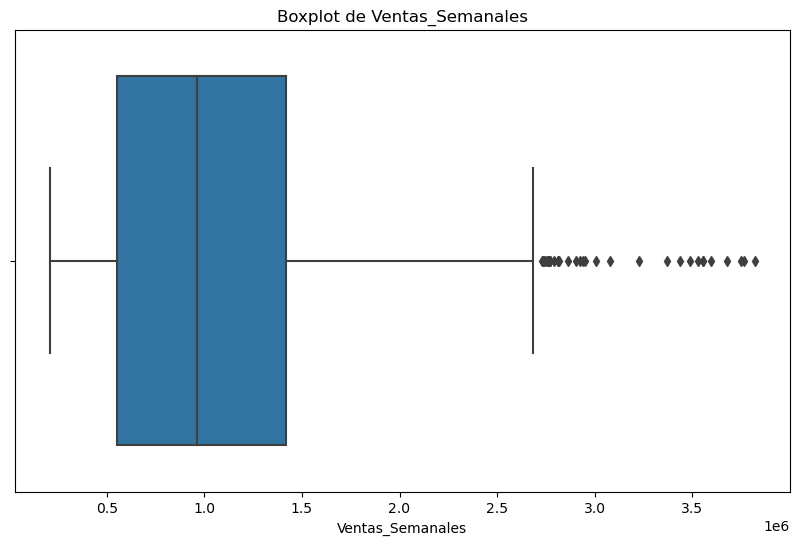

Bandera_Vacaciones tiene 450 outliers


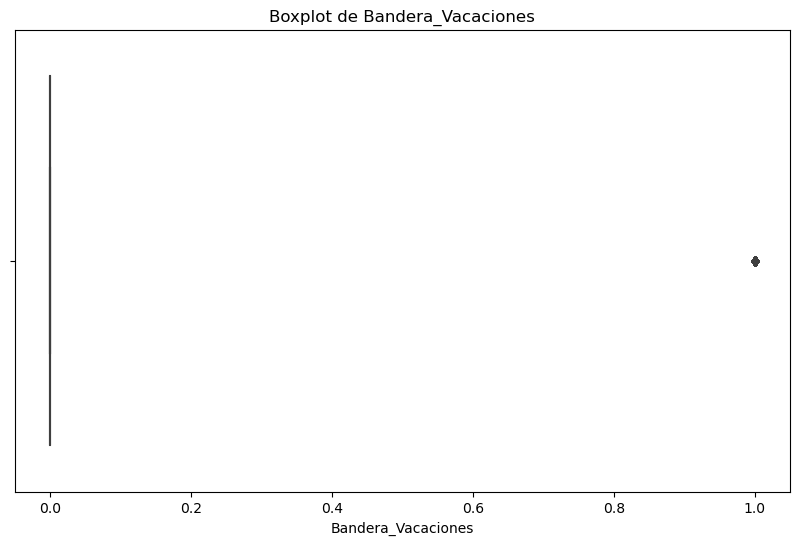

Temperatura tiene 3 outliers


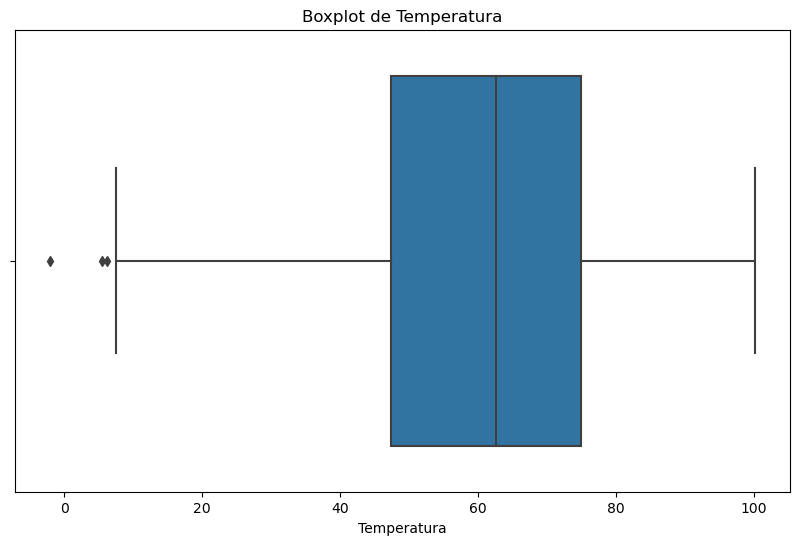

Precio_Combustible tiene 0 outliers


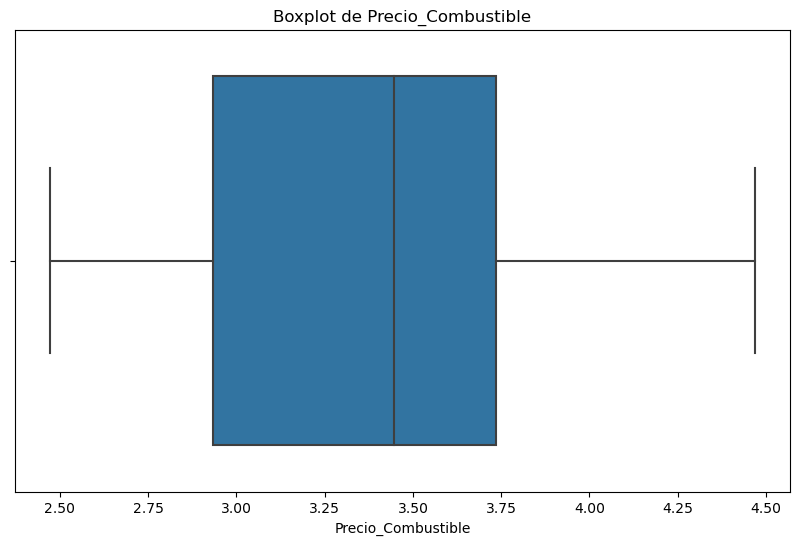

IPC tiene 0 outliers


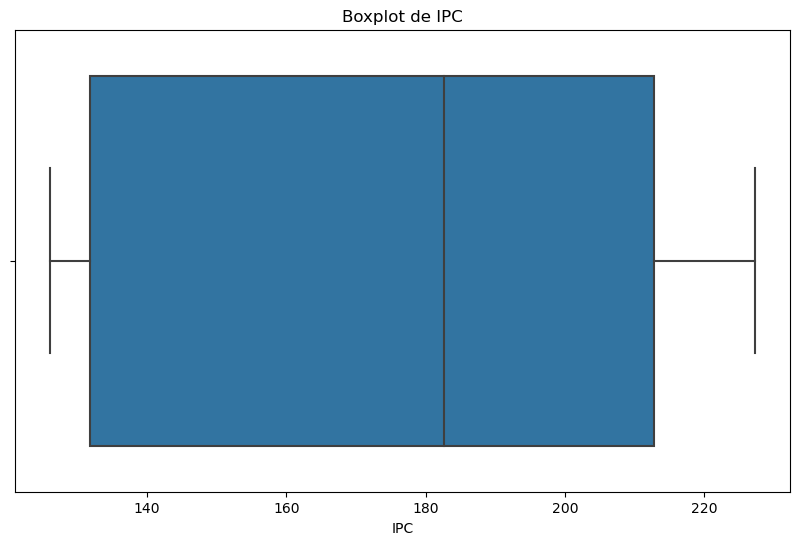

Desempleo tiene 481 outliers


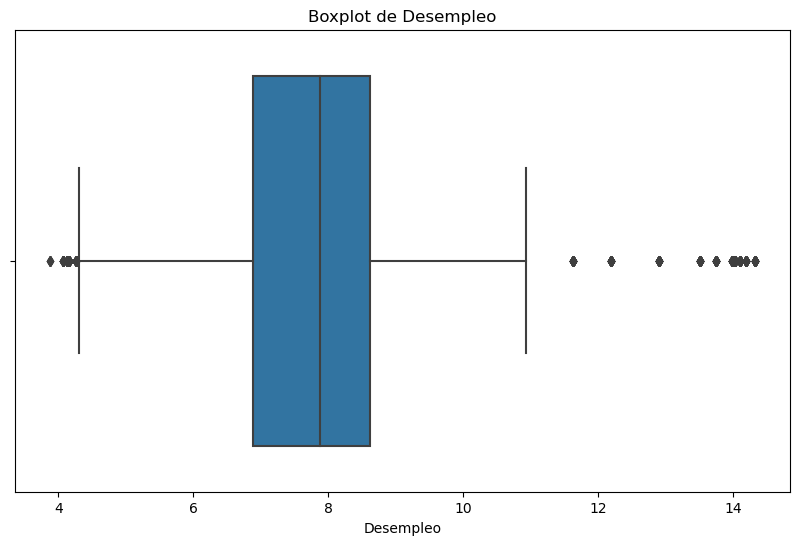

In [8]:
# Función para detectar y reportar outliers en cada variable numérica
def detectar_outliers(df):
    for columna in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Calcular el número de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]
        print(f"{columna} tiene {outliers.count()} outliers")
        
        # Visualización de outliers con boxplot
        plt.figure(figsize=(10,6))
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.show()

# Llamar a la función para detectar outliers
detectar_outliers(df)

Se usara Transformación de datos: Aplicar transformaciones logarítmicas o de raíz cuadrada puede ayudar a reducir el efecto de los outliers.

In [9]:
# Aplicar transformación logarítmica a las variables numéricas, excluyendo cualquier valor no positivo
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    # Verificar que todos los valores sean positivos
    if (df[columna] <= 0).any():
        print(f"La columna {columna} contiene valores no positivos, se considerará una transformación alternativa.")
    else:
        df[columna + '_log'] = np.log(df[columna])

# Mostrar las primeras filas del DataFrame para verificar las nuevas columnas transformadas
df.head()

La columna Bandera_Vacaciones contiene valores no positivos, se considerará una transformación alternativa.
La columna Temperatura contiene valores no positivos, se considerará una transformación alternativa.


,Tienda,Fecha,Ventas_Semanales,Bandera_Vacaciones,Temperatura,Precio_Combustible,IPC,Desempleo,Evento,Tienda_log,Ventas_Semanales_log,Precio_Combustible_log,IPC_log,Desempleo_log
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,None,0.0,14.312455,0.944684,5.352315,2.092605
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl,0.0,14.311400,0.935309,5.353005,2.092605
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,None,0.0,14.292966,0.921875,5.353228,2.092605
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,None,0.0,14.158907,0.940398,5.353372,2.092605
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,None,0.0,14.256862,0.965081,5.353516,2.092605


#### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

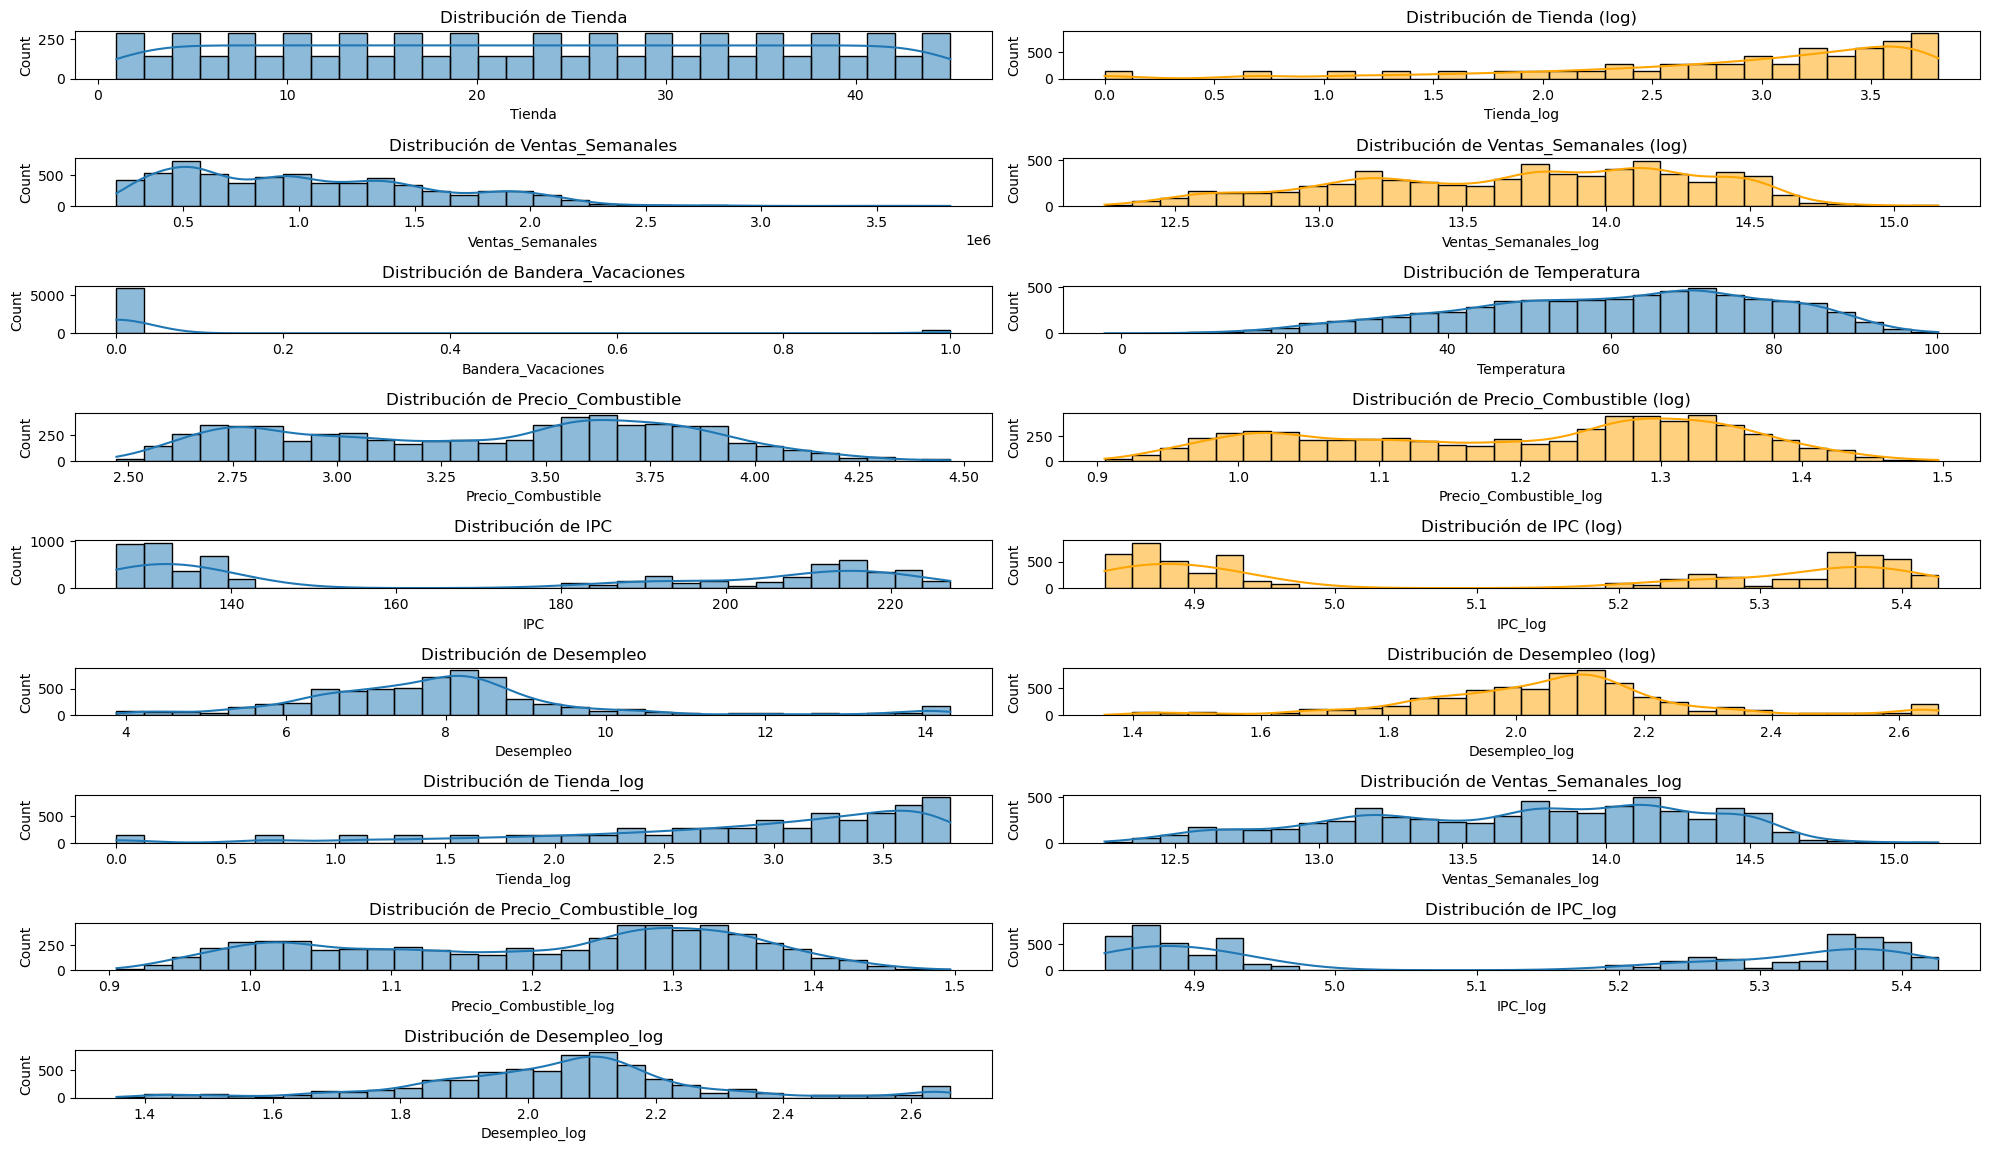

In [10]:
# Definir el tamaño de los gráficos
plt.figure(figsize=(20, 15))

# Contador para los subplots
contador = 1

# Lista de columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Graficar distribuciones originales
for columna in columnas_numericas:
    plt.subplot(len(columnas_numericas), 2, contador)
    sns.histplot(df[columna], kde=True, bins=30)
    plt.title(f'Distribución de {columna}')
    contador += 1

    # Si existe una versión transformada (log), graficarla también
    if columna + '_log' in df.columns:
        plt.subplot(len(columnas_numericas), 2, contador)
        sns.histplot(df[columna + '_log'], kde=True, color='orange', bins=30)
        plt.title(f'Distribución de {columna} (log)')
        contador += 1

plt.tight_layout()
plt.show()

### Observaciones de las Distribuciones de Variables:

1. **Distribución de Tienda**: 
   - La distribución parece ser uniforme, indicando datos similares en cantidad para cada tienda.
   - No se observan outliers ni sesgo.
   - No es necesaria una transformación logarítmica para esta variable categórica.

2. **Distribución de Ventas Semanales**: 
   - Claramente sesgada a la derecha.
   - La transformación logarítmica normaliza la distribución, haciéndola más simétrica y atenuando outliers.

3. **Distribución de Bandera de Vacaciones**: 
   - Parece ser una variable binaria, por lo que las transformaciones logarítmicas no son aplicables.

4. **Distribución de Precio de Combustible**: 
   - Presenta un sesgo que la transformación logarítmica ayuda a suavizar, aunque no tan pronunciadamente.

5. **Distribución de IPC**: 
   - Hay una concentración de datos en ciertos rangos.
   - La transformación logarítmica no altera significativamente la forma pero suaviza ligeramente el sesgo.

6. **Distribución de Desempleo**: 
   - La transformación logarítmica suaviza el sesgo presente en los datos.

### Consideraciones Adicionales:

- **Histogramas Azules (Distribuciones Originales)**: 
  - Reflejan las escalas y distribuciones reales de los datos.
  - Útiles para identificar rangos, sesgos y presencia de outliers que pueden influir en el análisis.

- **Histogramas Naranjas (Distribuciones Logarítmicas)**: 
  - Muestran los efectos de las transformaciones en reducción de sesgo y outliers.
  - Pueden ser más adecuadas para técnicas estadísticas que asumen normalidad en las distribuciones de las variables.




#### 6. Obtenga las correlaciones entre los datos de corte numérico. 

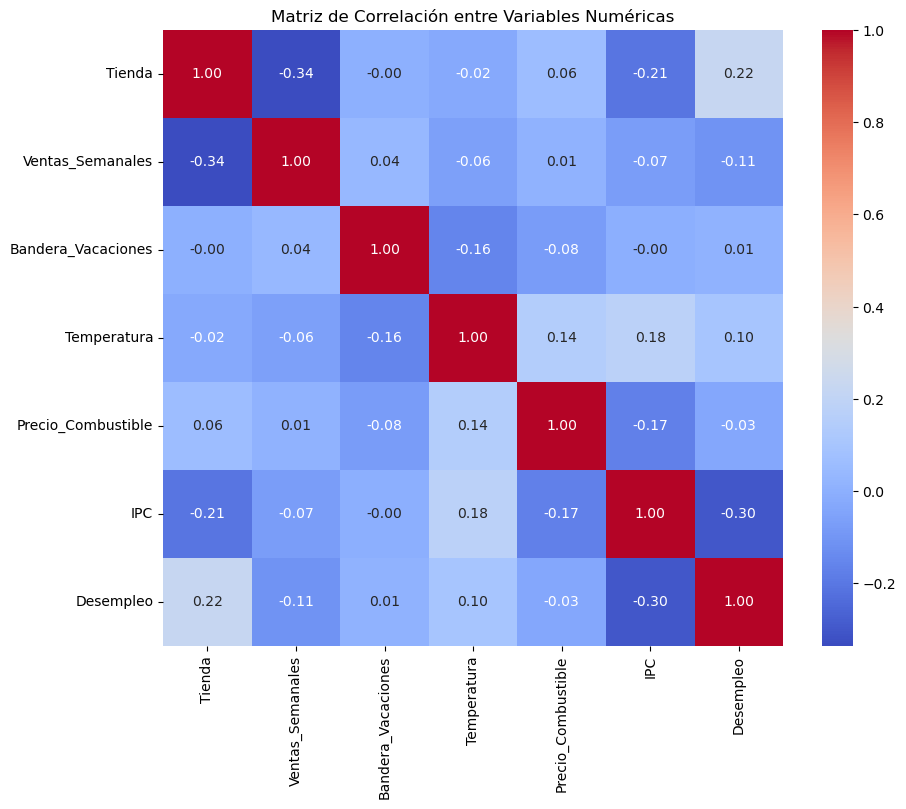

In [15]:
# Calculamos la matriz de correlación solo para las variables numéricas
matriz_correlacion = df[variables_numericas].corr(numeric_only=True)

# Mostrar la matriz de correlación usando un heatmap para mejor visualización
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


#### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

#### Dado que estamos trabajando con un conjunto de datos de ventas, la variable más lógica para ser la dependiente sería "Ventas_Semanales", ya que generalmente se quiere predecir o entender los factores que influyen en las ventas.

Dependiente:

* Ventas_Semanales

Independientes:

- Tienda: Aunque tiene una correlación negativa con las ventas, puede ser importante para capturar diferencias estructurales entre tiendas.
- Temperatura: Tiene una baja correlación con las ventas, pero podría ser relevante dependiendo del contexto geográfico y estacional.
- Precio_Combustible: Aunque tiene una correlación muy débil, el precio del combustible podría afectar el comportamiento del consumidor y los costos logísticos.
- IPC: Podría incluirse para capturar efectos económicos generales, aunque se debe tener cuidado con la multicolinealidad si está correlacionado con otras variables macroeconómicas.
- Desempleo: Es posible que haya una relación causal entre la tasa de desempleo y las ventas, ya que podría influir en el poder adquisitivo de los consumidores.

#### 8. Indique que tipo de modelación realizarán y porqué. 

- Se ha optado por Bosques aleatorios (Random Forest), un ensamblaje de árboles de decisión que son entrenados en subconjuntos aleatorios del dataset y luego promedian sus predicciones. Los bosques aleatorios son menos propensos al sobreajuste y pueden capturar relaciones no lineales y de orden superior entre las variables.

- Estos modelos no lineales pueden capturar relaciones complejas entre las variables y no requieren suposiciones de linealidad o normalidad. Los bosques aleatorios, en particular, son menos propensos al sobreajuste y pueden manejar una gran cantidad de predictores.


Mean Squared Error (MSE): 21677879001.42671
Coefficient of Determination (R^2): 0.9327096947203809
Importancia de cada variable en el modelo:
[('Tienda', 0.664468563122853), ('Bandera_Vacaciones', 0.0035825887848866833), ('Temperatura', 0.02956568564348572), ('Precio_Combustible', 0.025961958251683365), ('IPC', 0.16703661926117427), ('Desempleo', 0.10938458493591703)]


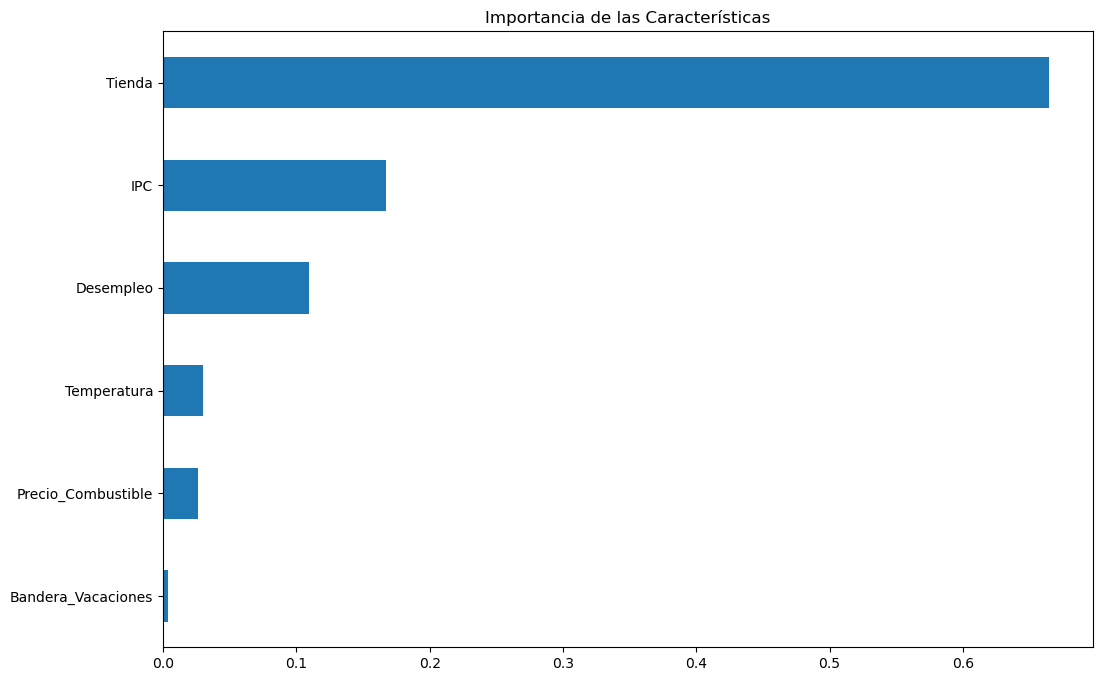

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Primero, preparamos las variables predictoras (X) y la variable objetivo (y)
X = df[variables_numericas].drop('Ventas_Semanales', axis=1)  # Excluir la variable objetivo
y = df['Ventas_Semanales']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir las ventas en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de rendimiento
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Obtener la importancia de cada variable:
importancias = rf_model.feature_importances_
variables_importancia = list(zip(X.columns, importancias))
print("Importancia de cada variable en el modelo:")
print(variables_importancia)

# Visualizar la importancia de las características:
plt.figure(figsize=(12, 8))
importancias = pd.Series(importancias, index=X.columns)
importancias = importancias.sort_values()
importancias.plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()

#### 9. Verifique los supuestos, de haber escogido el enfoque econométrico.

#### Resultados del Modelo de Random Forest

#### Métricas de Rendimiento
- **Error Cuadrático Medio (MSE)**: El MSE de 21,677,879,001.43 indica el promedio del cuadrado de los errores. Cuanto más cercano a cero, mejor es el modelo.
- **Coeficiente de Determinación (R²)**: Un R² de 0.9327 sugiere que el modelo es capaz de explicar aproximadamente el 93.27% de la variabilidad de las ventas semanales. 

#### Importancia de las Características
La importancia de las variables, que mide cuánto contribuyen a la capacidad predictiva del modelo, se presenta de la siguiente manera:

- `Tienda`: 66.44%
- `IPC`: 16.70%
- `Desempleo`: 10.94%
- `Temperatura`: 2.96%
- `Precio_Combustible`: 2.60%
- `Bandera_Vacaciones`: 0.36%

Estos valores indican que la característica más influyente es la `Tienda`, seguida del `IPC` y `Desempleo`.

### Pasos Siguientes
- **Validación del Modelo**: Realizar una validación cruzada o probar el modelo en un conjunto de datos separado para verificar la generalización del modelo.
- **Revisión de Variables**: Investigar la influencia dominante de la variable `Tienda` y considerar si se han omitido características importantes.
- **Ajuste de Hiperparámetros**: Ajustar hiperparámetros del Random Forest para optimizar el rendimiento.
- **Inclusión de Variables Adicionales**: Incluir más variables que podrían tener influencia sobre las ventas, como datos categóricos y temporales.
- **Revisar Overfitting**: Evaluar si el modelo está sobreajustado a los datos de entrenamiento comparando con un conjunto de validación independiente.
- **Interpretación Cautelosa**: Usar la importancia de las características como una guía, pero no como una demostración de causalidad.



#### 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [13]:
# Predicciones con el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calculamos métricas de rendimiento
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)  # Raíz del MSE para comparar en la misma escala que y
r2_test = r2_score(y_test, y_pred)

# Imprimimos las métricas
print(f"Mean Squared Error (MSE) en el conjunto de prueba: {mse_test}")
print(f"Root Mean Squared Error (RMSE) en el conjunto de prueba: {rmse_test}")
print(f"Coefficient of Determination (R²) en el conjunto de prueba: {r2_test}")


Mean Squared Error (MSE) en el conjunto de prueba: 21677879001.42671
Root Mean Squared Error (RMSE) en el conjunto de prueba: 147234.09592015942
Coefficient of Determination (R²) en el conjunto de prueba: 0.9327096947203809


#### 11. Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

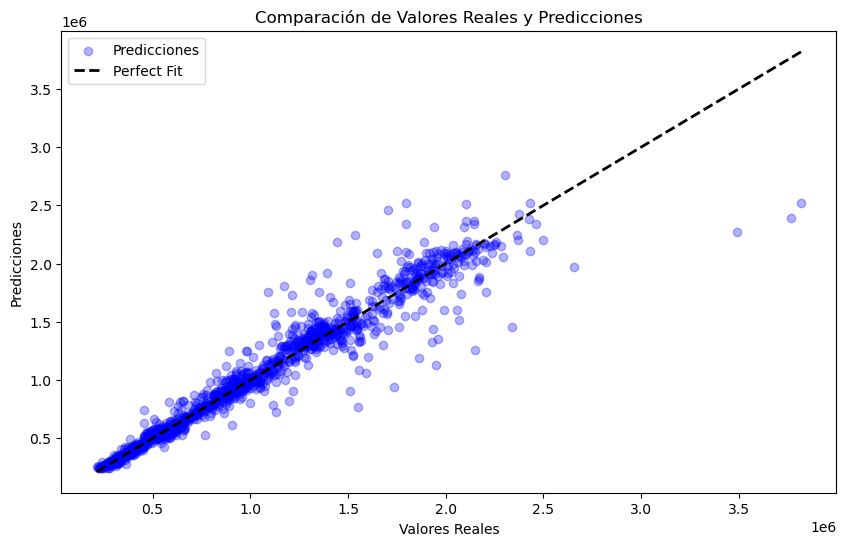

In [14]:
# Graficamos los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Predicciones')  # Puntos de predicción
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')  # Línea de perfecto ajuste
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()


#### 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 

## Conclusión del Modelo de Machine Learning

La gráfica muestra que las predicciones del modelo de Random Forest están bastante alineadas con los valores reales, evidenciando la capacidad del modelo para capturar la tendencia general en las ventas semanales. Sin embargo, se observa cierta dispersión en los puntos, especialmente para valores altos, lo que sugiere que hay espacio para mejorar el modelo.

### Variables con Mayor Poder Explicativo

- **Tienda**: Es el predictor más fuerte de las ventas semanales, lo que puede deberse a factores como la ubicación, el tamaño y la base de clientes de la tienda.
- **IPC (Índice de Precios al Consumidor)**: Indica que las condiciones económicas generales y el poder adquisitivo son importantes en la predicción de las ventas.
- **Desempleo**: También se destaca como un predictor significativo, alineándose con la idea de que la salud económica de la región influye en el comportamiento de compra de los consumidores.

Variables como la **Bandera de Vacaciones**, **Temperatura** y **Precio del Combustible** tienen una importancia menor en el modelo.

### Evaluación de Métricas

El modelo muestra un coeficiente de determinación \( R^2 \) alto, lo que implica una buena capacidad predictiva. No obstante, el análisis de la importancia de las características nos recuerda que debemos considerar el contexto del negocio para interpretar estos resultados correctamente.

### Implicaciones para el Negocio

Dado que la variable 'Tienda' domina en importancia, se recomienda realizar un análisis más detallado para entender qué factores específicos están contribuyendo a este resultado. Podría ser útil segmentar las tiendas y analizar si hay diferencias significativas que puedan ser explotadas para mejorar las ventas.
